# Модель логистической регрессии для прогноза дождя в Австралии


В этом проекте реализована модель логистической регрессии с помощью Python и библиотеки Scikit-Learn. 
Создана и обучена модель бинарного классификатора на основе логистической регрессии для прогнозирования того, будет ли завтра дождь в Австралии. 
Для данного проекта использовался набор данных **Rain in Australia**, загруженный с сайта Kaggle.

## Введение в логистическую регрессию


Когда специалисты по данным сталкиваются с новой проблемой классификации, первым алгоритмом, который приходит им на ум, является **логистическая регрессия**. Это алгоритм обучение с учителем (Supervised learning), который используется для прогнозирования наблюдений в дискретном наборе классов. На практике он используется для классификации наблюдений в различные категории. Следовательно, его вывод является дискретным по своей природе. **логистическая регрессия** также называется **логит-регрессией**. Это один из самых простых, понятных и универсальных алгоритмов классификации, который используется для решения задач классификации.

## Логистическая регрессия - описание модели


В статистике **модель логистической регрессии** — это широко используемая статистическая модель, которая в основном используется для целей классификации. Это означает, что при заданном наборе наблюдений алгоритм логистической регрессии помогает нам классифицировать эти наблюдения в два или более дискретных класса. Таким образом, целевая переменная является дискретной по своей природе.

Алгоритм логистической регрессии работает, реализуя линейное уравнение с независимыми или объясняющими переменными для прогнозирования значения отклика. Это прогнозируемое значение отклика, обозначенное z, затем преобразуется в значение вероятности, которое лежит в диапазоне от 0 до 1. Мы используем **сигмоидальную функцию**, чтобы сопоставить прогнозируемые значения со значениями вероятности. Затем эта сигмоидальная функция сопоставляет любое действительное значение со значением вероятности в диапазоне от 0 до 1.

Сигмоидальная функция возвращает значение вероятности в диапазоне от 0 до 1. Затем это значение вероятности сопоставляется с дискретным классом, который является либо «0», либо «1». Чтобы сопоставить это значение вероятности с дискретным классом (пройдено/не пройдено, да/нет, правда/ложь), мы выбираем пороговое значение. Это пороговое значение называется **Граница принятия решения**. Выше этого порогового значения мы отобразим значения вероятности в класс 1, а ниже — в класс 0.

Математически это можно выразить следующим образом:-


                    p ≥ 0.5 => class = 1
    
                    p < 0.5 => class = 0 


Обычно граница решения устанавливается на 0,5. Таким образом, если значение вероятности равно 0,8 (> 0,5), мы отнесем это наблюдение к классу 1. Аналогично, если значение вероятности равно 0,2 (< 0,5), мы отнесем это наблюдение к классу 0.

Мы можем использовать наши знания о `сигмоидной функции` и `границе решения`, чтобы написать функцию прогнозирования. Функция прогнозирования в логистической регрессии возвращает вероятность того, что наблюдение будет положительным, `Да` или `Истина`. Мы называем это `классом 1` и обозначаем `P(класс = 1)`. Если вероятность приближается к единице, то мы будем более уверены в нашей модели, что наблюдение относится к классу 1.

## Постановка задачи


В этом проектк мы создаем модель логистической регрессии для прогноза дождя в Австралии

Модель логистической регрессии с помощью Python и библиотеки Scikit-Learn. 
Создана и обучена модель бинарного классификатора на основе логистической регрессии для прогнозирования того, будет ли завтра дождь в Австралии. 
Для данного проекта мы используем набор данных **Rain in Australia**, загруженный с сайта Kaggle.

## Описание набора данных


Для данного проекта мы используем набор данных **Rain in Australia**, загруженный с сайта Kaggle, доступный по следующей ссылке:


https://www.kaggle.com/jsphyg/weather-dataset-rattle-package


Этот набор данных содержит ежедневные наблюдения за погодой с многочисленных австралийских метеостанций.

## Импорт библиотек

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [113]:
import warnings

warnings.filterwarnings('ignore')

In [114]:
#import kagglehub

# Download latest version
#path = kagglehub.dataset_download("jsphyg/weather-dataset-rattle-package")

#print("Path to dataset files:", path)

## Импорт набора данных

In [115]:
data = 'C:/Python/datasets/weatherAUS.csv'

df = pd.read_csv(data)

## Исследовательский анализ данных


Проведем исследовательский анализ данных.

In [116]:
# view dimensions of dataset

df.shape

(145460, 23)

Мы видим, что в наборе данных имеется 145460 экземпляра и 23 переменные.

In [117]:
# preview the dataset

df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [118]:
col_names = df.columns

col_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [119]:
df = df[df['RainTomorrow'].notna()]

In [120]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null   fl

### Типы переменных


В этом разделе мы разделяем набор данных на категориальные и числовые переменные. В наборе данных есть смесь категориальных и числовых переменных. Категориальные переменные имеют тип данных object. Числовые переменные имеют тип данных float64.

In [121]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 7 categorical variables

The categorical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [122]:
# view the categorical variables

df[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


### Описание категориальных переменных


- Есть переменная даты. Она обозначена столбцом `Date`.

- Есть 6 категориальных переменных. Они задаются `Location`, `WindGustDir`, `WindDir9am`, `WindDir3pm`, `RainToday` и `RainTomorrow`.

- Есть две бинарные категориальные переменные - `RainToday` и `RainTomorrow`.

- `RainTomorrow` - целевая переменная.

## Исследование проблем в категориальных переменных


### Пропущенные значения в категориальных переменных

In [123]:
# check missing values in categorical variables

df[categorical].isnull().sum()

Date                0
Location            0
WindGustDir      9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64

In [124]:
# print categorical variables containing missing values

cat1 = [var for var in categorical if df[var].isnull().sum()!=0]

print(df[cat1].isnull().sum())

WindGustDir     9330
WindDir9am     10013
WindDir3pm      3778
RainToday       1406
dtype: int64


Мы видим, что в наборе данных есть только 4 категориальные переменные, которые содержат пропущенные значения. Это `WindGustDir`, `WindDir9am`, `WindDir3pm` и `RainToday`.

Теперь мы проводим количественные подсчеты категориальных переменных.

In [125]:
# view frequency of categorical variables

for var in categorical: 
    
    print(df[var].value_counts())

Date
2013-12-01    49
2014-01-09    49
2014-01-11    49
2014-01-12    49
2014-01-13    49
              ..
2007-11-29     1
2007-11-28     1
2007-11-27     1
2007-11-26     1
2008-01-31     1
Name: count, Length: 3436, dtype: int64
Location
Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Launceston          3028
Ballarat            3028
Albany              3016
Albury              3011
PerthAirport        3009
MelbourneAirport    3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cairns              2988
Cobar               2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
Penrith  

### Количество меток 

In [126]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

Date  contains  3436  labels
Location  contains  49  labels
WindGustDir  contains  17  labels
WindDir9am  contains  17  labels
WindDir3pm  contains  17  labels
RainToday  contains  3  labels
RainTomorrow  contains  2  labels


Мы видим, что есть переменная `Date`, которую необходимо предварительно обработать. 

In [127]:
df['Date'].dtypes

dtype('O')

Препобрпзуем 'Date', в формат datetime.

In [128]:
# parse the dates, currently coded as strings, into datetime format

df['Date'] = pd.to_datetime(df['Date'])

In [129]:
# extract year from date

df['Year'] = df['Date'].dt.year

df['Year'].head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Year, dtype: int32

In [130]:
# extract month from date

df['Month'] = df['Date'].dt.month

df['Month'].head()

0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: int32

In [131]:
# extract day from date

df['Day'] = df['Date'].dt.day

df['Day'].head()

0    1
1    2
2    3
3    4
4    5
Name: Day, dtype: int32

In [132]:
# again view the summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 145458
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           142193 non-null  datetime64[ns]
 1   Location       142193 non-null  object        
 2   MinTemp        141556 non-null  float64       
 3   MaxTemp        141871 non-null  float64       
 4   Rainfall       140787 non-null  float64       
 5   Evaporation    81350 non-null   float64       
 6   Sunshine       74377 non-null   float64       
 7   WindGustDir    132863 non-null  object        
 8   WindGustSpeed  132923 non-null  float64       
 9   WindDir9am     132180 non-null  object        
 10  WindDir3pm     138415 non-null  object        
 11  WindSpeed9am   140845 non-null  float64       
 12  WindSpeed3pm   139563 non-null  float64       
 13  Humidity9am    140419 non-null  float64       
 14  Humidity3pm    138583 non-null  float64       
 15  Press

Мы видим, что из переменной `Date` создано три дополнительных столбца. Теперь удалим исходную переменную `Date` из набора данных.

In [133]:
# drop the original Date variable

df.drop('Date', axis=1, inplace = True)

In [134]:
# preview the dataset again

df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


Убедились, что переменная `Date` была удалена из набора данных.


### Исследуем категориальные переменные

Изучим категориальные переменные одну за другой.

In [135]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 6 categorical variables

The categorical variables are : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


Мы видим, что в наборе данных есть 6 категориальных переменных. Переменная `Date` была удалена. Сначала мы проверим пропущенные значения в категориальных переменных.

In [136]:
# check for missing values in categorical variables 

df[categorical].isnull().sum()

Location            0
WindGustDir      9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64

Мы видим, что переменные `WindGustDir`, `WindDir9am`, `WindDir3pm`, `RainToday` содержат пропущенные значения.  

### Исследуем переменную `Location`

In [137]:
# print number of labels in Location variable

print('Location contains', len(df.Location.unique()), 'labels')

Location contains 49 labels


In [138]:
# check labels in location variable

df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [139]:
# check frequency distribution of values in Location variable

df.Location.value_counts()

Location
Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Launceston          3028
Ballarat            3028
Albany              3016
Albury              3011
PerthAirport        3009
MelbourneAirport    3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cairns              2988
Cobar               2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
Penrith             2964
NorfolkIsland       2964
SalmonGums          2955
Newcastle           2955
CoffsHarbour        2953
Witchcliffe         2952
Richmond            2951
Dartmoor            2943
NorahHead           2929
BadgerysCreek   

In [140]:
# let's do One Hot Encoding of Location variable
# get k-1 dummy variables after One Hot Encoding 
# preview the dataset with head() method

pd.get_dummies(df.Location, drop_first=True).head()

,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,...,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Исследуем переменную `WindGustDir`

In [141]:
# print number of labels in WindGustDir variable

print('WindGustDir contains', len(df['WindGustDir'].unique()), 'labels')

WindGustDir contains 17 labels


In [142]:
# check labels in WindGustDir variable

df['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', nan, 'E', 'SSW'], dtype=object)

In [143]:
# check frequency distribution of values in WindGustDir variable

df.WindGustDir.value_counts()

WindGustDir
W      9780
SE     9309
E      9071
N      9033
SSE    8993
S      8949
WSW    8901
SW     8797
SSW    8610
WNW    8066
NW     8003
ENE    7992
ESE    7305
NE     7060
NNW    6561
NNE    6433
Name: count, dtype: int64

In [144]:
# Выполним One Hot Encoding переменной WindGustDir

# let's do One Hot Encoding of WindGustDir variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [145]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).sum(axis=0)

ENE    7992
ESE    7305
N      9033
NE     7060
NNE    6433
NNW    6561
NW     8003
S      8949
SE     9309
SSE    8993
SSW    8610
SW     8797
W      9780
WNW    8066
WSW    8901
NaN    9330
dtype: int64

### Исследуем переменную `WindDir9am`

In [146]:
# print number of labels in WindDir9am variable

print('WindDir9am contains', len(df['WindDir9am'].unique()), 'labels')

WindDir9am contains 17 labels


In [147]:
# check labels in WindDir9am variable

df['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [148]:
# check frequency distribution of values in WindDir9am variable

df['WindDir9am'].value_counts()

WindDir9am
N      11393
SE      9162
E       9024
SSE     8966
NW      8552
S       8493
W       8260
SW      8237
NNE     7948
NNW     7840
ENE     7735
ESE     7558
NE      7527
SSW     7448
WNW     7194
WSW     6843
Name: count, dtype: int64

In [149]:
# Применим One Hot Encoding переменной WindDir9am

# let's do One Hot Encoding of WindDir9am variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [150]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).sum(axis=0)

ENE     7735
ESE     7558
N      11393
NE      7527
NNE     7948
NNW     7840
NW      8552
S       8493
SE      9162
SSE     8966
SSW     7448
SW      8237
W       8260
WNW     7194
WSW     6843
NaN    10013
dtype: int64

### Исследуем переменную `WindDir3pm`

In [151]:
# print number of labels in WindDir3pm variable

print('WindDir3pm contains', len(df['WindDir3pm'].unique()), 'labels')

WindDir3pm contains 17 labels


In [152]:
# check labels in WindDir3pm variable

df['WindDir3pm'].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

In [153]:
# check frequency distribution of values in WindDir3pm variable

df['WindDir3pm'].value_counts()

WindDir3pm
SE     10663
W       9911
S       9598
WSW     9329
SW      9182
SSE     9142
N       8667
WNW     8656
NW      8468
ESE     8382
E       8342
NE      8164
SSW     8010
NNW     7733
ENE     7724
NNE     6444
Name: count, dtype: int64

In [154]:
# let's do One Hot Encoding of WindDir3pm variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [155]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True).sum(axis=0)

ENE     7724
ESE     8382
N       8667
NE      8164
NNE     6444
NNW     7733
NW      8468
S       9598
SE     10663
SSE     9142
SSW     8010
SW      9182
W       9911
WNW     8656
WSW     9329
NaN     3778
dtype: int64

### Исследуем переменную `RainToday`

In [156]:
# print number of labels in RainToday variable

print('RainToday contains', len(df['RainToday'].unique()), 'labels')

RainToday contains 3 labels


In [157]:
# check labels in WindGustDir variable

df['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

In [158]:
# check frequency distribution of values in WindGustDir variable

df.RainToday.value_counts()

RainToday
No     109332
Yes     31455
Name: count, dtype: int64

In [159]:
# let's do One Hot Encoding of RainToday variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df.RainToday, drop_first=True, dummy_na=True).head()

,Yes,NaN
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False


In [160]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df.RainToday, drop_first=True, dummy_na=True).sum(axis=0)

Yes    31455
NaN     1406
dtype: int64

### Исследуем числовые переменные

In [161]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 19 numerical variables

The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


In [162]:
# view the numerical variables

df[numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,2008,12,1
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,2008,12,2
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,2008,12,3
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,2008,12,4
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,2008,12,5


### Сводка о числовых переменных

- Имеется 16 числовых переменных.

- Они задаются как `MinTemp`, `MaxTemp`, `Rainfall`, `Evaporation`, `Sunshine`, `WindGustSpeed`, `WindSpeed9am`, `WindSpeed3pm`, `Humidity9am`, `Humidity3pm`, `Pressure9am`, `Pressure3pm`, `Cloud9am`, `Cloud3pm`, `Temp9am` и `Temp3pm`.

## Исследуем проблемы в числовых переменных

### Пропущенные значения в числовых переменных

In [163]:
# check missing values in numerical variables

df[numerical].isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
Year                 0
Month                0
Day                  0
dtype: int64

Мы видим, что все 16 числовых переменных содержат пропущенные значения.

### Выбросы в числовых переменных

In [164]:
# view summary statistics in numerical variables

print(round(df[numerical].describe()),2)

        MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  141556.0  141871.0  140787.0      81350.0   74377.0       132923.0   
mean       12.0      23.0       2.0          5.0       8.0           40.0   
std         6.0       7.0       8.0          4.0       4.0           14.0   
min        -8.0      -5.0       0.0          0.0       0.0            6.0   
25%         8.0      18.0       0.0          3.0       5.0           31.0   
50%        12.0      23.0       0.0          5.0       8.0           39.0   
75%        17.0      28.0       1.0          7.0      11.0           48.0   
max        34.0      48.0     371.0        145.0      14.0          135.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count      140845.0      139563.0     140419.0     138583.0     128179.0   
mean           14.0          19.0         69.0         51.0       1018.0   
std             9.0           9.0         19.0         21.0          7.0   
mi

При более внимательном рассмотрении мы видим, что столбцы `Осадки`, `Испарение`, `Скорость ветра9am` и `Скорость ветра3pm` могут содержать выбросы.

Нарисуем диаграммы ящиков, чтобы визуализировать выбросы в приведенных выше переменных.

Text(0, 0.5, 'WindSpeed3pm')

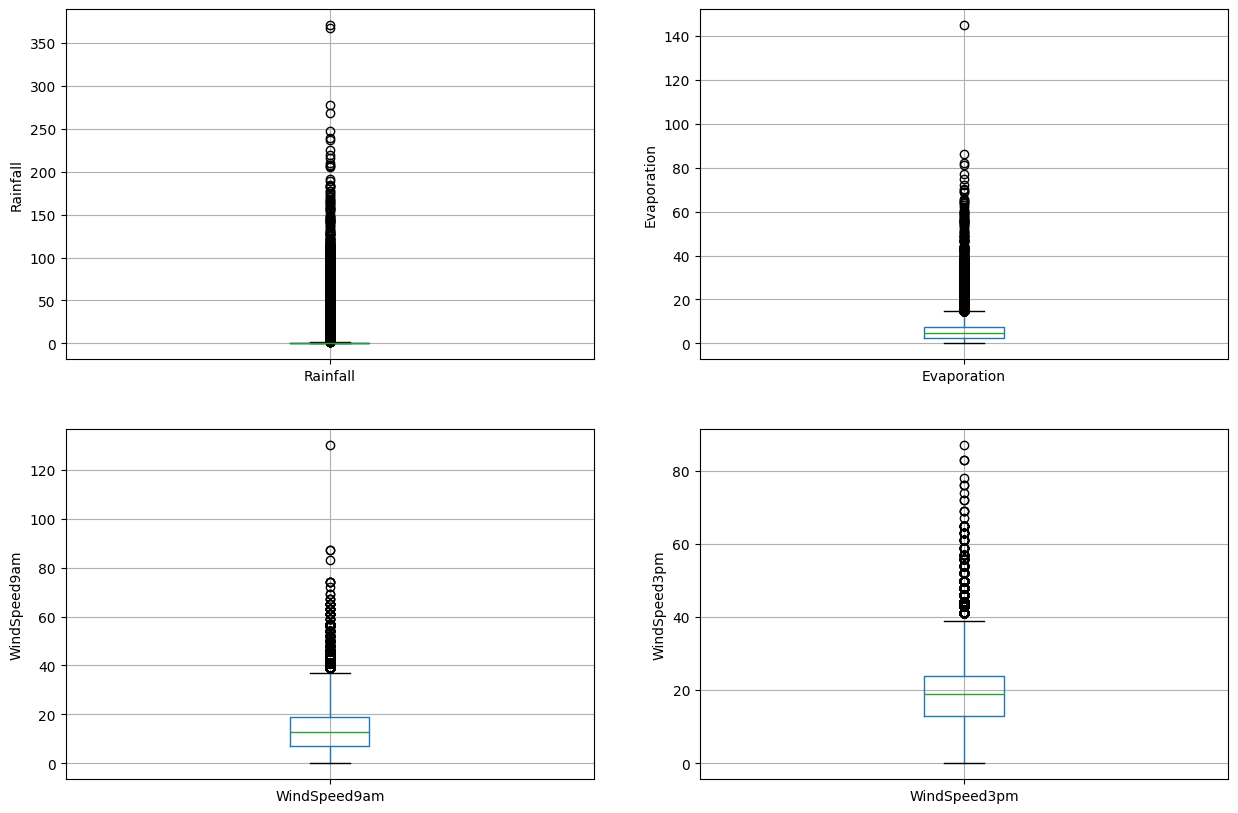

In [165]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

Приведенные выше диаграммы подтверждают, что в этих переменных имеется много выбросов.

### Проверка распределения переменных

Построим гистограммы, чтобы проверить распределения и выяснить, являются ли они нормальными или асимметричными. Если переменная следует нормальному распределению, то мы проведим `Анализ экстремальных значений`, в противном случае, если они асимметричны, мы найдем IQR (межквантильный диапазон).

Text(0, 0.5, 'RainTomorrow')

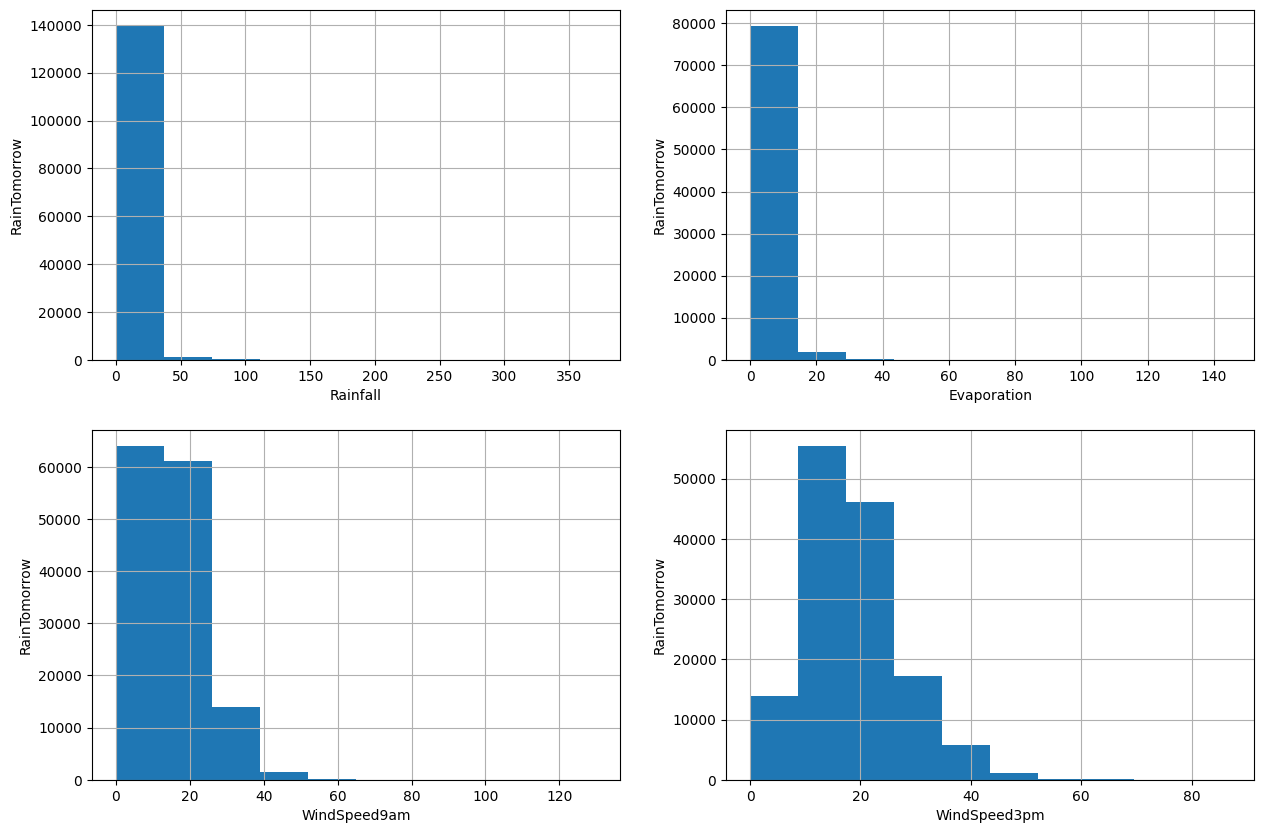

In [166]:
# plot histogram to check distribution

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 2)
fig = df.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 3)
fig = df.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 4)
fig = df.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

Мы видим, что все четыре переменные искажены. Поэтому будем использовать межквантильную амплитуду для поиска выбросов.

In [167]:
# find outliers for Rainfall variable

IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Lower_fence = df.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = df.Rainfall.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


Rainfall outliers are values < -2.4000000000000004 or > 3.2


Для `Rainfall` минимальное и максимальное значения составляют 0,0 и 371,0. Таким образом, выбросы — это значения > 3,2.

In [168]:
# find outliers for Evaporation variable

IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
Lower_fence = df.Evaporation.quantile(0.25) - (IQR * 3)
Upper_fence = df.Evaporation.quantile(0.75) + (IQR * 3)
print('Evaporation outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


Evaporation outliers are values < -11.800000000000002 or > 21.800000000000004


Для `Evaporation` минимальное и максимальное значения составляют 0,0 и 145,0. Таким образом, выбросами являются значения > 21,8.

In [169]:
# find outliers for WindSpeed9am variable

IQR = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
Lower_fence = df.WindSpeed9am.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed9am.quantile(0.75) + (IQR * 3)
print('WindSpeed9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


WindSpeed9am outliers are values < -29.0 or > 55.0


Для `WindSpeed9am` минимальное и максимальное значения составляют 0,0 и 130,0. Таким образом, выбросами являются значения > 55,0.

In [170]:
# find outliers for WindSpeed3pm variable

IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
Lower_fence = df.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('WindSpeed3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


WindSpeed3pm outliers are values < -20.0 or > 57.0


Для `WindSpeed3pm` минимальное и максимальное значения равны 0,0 и 87,0. Таким образом, выбросами являются значения > 57,0.

## Объявляем вектор признаков и целевую переменную

In [171]:
X = df.drop(['RainTomorrow'], axis=1)

y = df['RainTomorrow']

In [172]:
print(y.isna().sum().sum())

0


## Разделяем данные на отдельные обучающий и тестовый наборы

In [173]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [174]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((113754, 24), (28439, 24))

## Генерация признаков

**Генерация признаков** — это процесс преобразования необработанных данных в полезные признаки, которые помогают нам лучше понять нашу модель и повысить ее предсказательную силу. Проведем генерация признаков для разных типов переменных.

In [175]:
# check data types in X_train

X_train.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
Year               int32
Month              int32
Day                int32
dtype: object

In [176]:
# display categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [177]:
# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'Day']

### Заполнение отсутствующих значений в числовых переменных



In [178]:
# check missing values in numerical variables in X_train

X_train[numerical].isnull().sum()

MinTemp            495
MaxTemp            264
Rainfall          1139
Evaporation      48718
Sunshine         54314
WindGustSpeed     7367
WindSpeed9am      1086
WindSpeed3pm      2094
Humidity9am       1449
Humidity3pm       2890
Pressure9am      11212
Pressure3pm      11186
Cloud9am         43137
Cloud3pm         45768
Temp9am            740
Temp3pm           2171
Year                 0
Month                0
Day                  0
dtype: int64

In [179]:
# check missing values in numerical variables in X_test

X_test[numerical].isnull().sum()

MinTemp            142
MaxTemp             58
Rainfall           267
Evaporation      12125
Sunshine         13502
WindGustSpeed     1903
WindSpeed9am       262
WindSpeed3pm       536
Humidity9am        325
Humidity3pm        720
Pressure9am       2802
Pressure3pm       2795
Cloud9am         10520
Cloud3pm         11326
Temp9am            164
Temp3pm            555
Year                 0
Month                0
Day                  0
dtype: int64

In [180]:
# print percentage of missing values in the numerical variables in training set

for col in numerical:
    if X_train[col].isnull().mean()>0:
        print(col, round(X_train[col].isnull().mean(),4))

MinTemp 0.0044
MaxTemp 0.0023
Rainfall 0.01
Evaporation 0.4283
Sunshine 0.4775
WindGustSpeed 0.0648
WindSpeed9am 0.0095
WindSpeed3pm 0.0184
Humidity9am 0.0127
Humidity3pm 0.0254
Pressure9am 0.0986
Pressure3pm 0.0983
Cloud9am 0.3792
Cloud3pm 0.4023
Temp9am 0.0065
Temp3pm 0.0191


### Замечание

Предположим, что данные отсутствуют полностью случайным образом (MCAR). Существует два метода, которые можно использовать для генерации пропущенных значений. Один из них — это добавдение среднего или медианы, а другой — добавление случайной выборочной. Когда в наборе данных есть выбросы, мы должны использовать додолнение медианными данными. Поэтому мы будем использовать дополнение на основе медианы, поскольку вменение медианы устойчиво к выбросам.

Мы будем восполнять пропущенные значения с помощью соответствующих статистических мер данных, в данном случае медианы. Заполнение пропущенных данных должно выполняться по обучающему набору, а затем распространяться на тестовый набор. Это означает, что статистические меры, которые будут использоваться для заполнения пропущенных значений как в обучающем, так и в тестовом наборе, должны быть извлечены только из обучающего набора. Это необходимо для того, чтобы избежать переобучения.

In [181]:
# impute missing values in X_train and X_test with respective column median in X_train

for df1 in [X_train, X_test]:
    for col in numerical:
        col_median=X_train[col].median()
        df1[col].fillna(col_median, inplace=True)           
      

In [182]:
# check again missing values in numerical variables in X_train

X_train[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [183]:
# check missing values in numerical variables in X_test

X_test[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

Теперь мы видим, что в числовых столбцах обучающего и тестового наборов нет пропущенных значений.

### Заполнение пропущенных значений в категориальных переменных

In [184]:
# print percentage of missing values in the categorical variables in training set

X_train[categorical].isnull().mean()

Location       0.000000
WindGustDir    0.065114
WindDir9am     0.070134
WindDir3pm     0.026443
RainToday      0.010013
dtype: float64

In [185]:
# print categorical variables with missing data

for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

WindGustDir 0.06511419378659213
WindDir9am 0.07013379749283542
WindDir3pm 0.026443026179299188
RainToday 0.01001283471350458


In [186]:
# impute missing categorical variables with most frequent value

for df2 in [X_train, X_test]:
    df2['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0], inplace=True)
    df2['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0], inplace=True)
    df2['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0], inplace=True)
    df2['RainToday'].fillna(X_train['RainToday'].mode()[0], inplace=True)

In [187]:
# check missing values in categorical variables in X_train

X_train[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [188]:
# check missing values in categorical variables in X_test

X_test[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

В качестве последней проверки проверяем наличие пропущенных значений в X_train и X_test.

In [189]:
# check missing values in X_train

X_train.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

In [190]:
# check missing values in X_test

X_test.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

Мы видим, что в X_train и X_test нет пропущенных значений.

### Обработка выбросов в числовых переменных

Мы увидели, что столбцы `Rainfall`, `Evaporation`, `WindSpeed9am` и `WindSpeed3pm` содержат выбросы. Будем использовать подход верхнего кодирования, чтобы ограничить максимальные значения и удалить выбросы из указанных выше переменных.

In [191]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3['Rainfall'] = max_value(df3, 'Rainfall', 3.2)
    df3['Evaporation'] = max_value(df3, 'Evaporation', 21.8)
    df3['WindSpeed9am'] = max_value(df3, 'WindSpeed9am', 55)
    df3['WindSpeed3pm'] = max_value(df3, 'WindSpeed3pm', 57)

In [192]:
X_train.Rainfall.max(), X_test.Rainfall.max()

(3.2, 3.2)

In [193]:
X_train.Evaporation.max(), X_test.Evaporation.max()

(21.8, 21.8)

In [194]:
X_train.WindSpeed9am.max(), X_test.WindSpeed9am.max()

(55.0, 55.0)

In [195]:
X_train.WindSpeed3pm.max(), X_test.WindSpeed3pm.max()

(57.0, 57.0)

In [196]:
X_train[numerical].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000
mean,12.193497,23.237216,0.675080,5.151606,8.041154,39.884074,13.978155,18.614756,68.867486,51.509547,1017.640649,1015.241101,4.651801,4.703588,16.995062,21.688643,2012.759727,6.404021,15.710419
std,6.388279,7.094149,1.183837,2.823707,2.769480,13.116959,8.806558,8.685862,18.935587,20.530723,6.738680,6.675168,2.292726,2.117847,6.463772,6.855649,2.540419,3.427798,8.796821
min,-8.200000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,2007.000000,1.000000,1.000000
25%,7.600000,18.000000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,3.000000,4.000000,12.300000,16.700000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,2013.000000,6.000000,16.000000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.300000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,3.200000,21.800000,14.500000,135.000000,55.000000,57.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,8.000000,40.200000,46.700000,2017.000000,12.000000,31.000000


Теперь мы видим, что выбросы в столбцах «Осадки», «Испарение», «Скорость ветра9am» и «Скорость ветра3pm» ограничены.

### Кодирование категориальных переменных

In [197]:
categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [198]:
X_train[categorical].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
113462,Witchcliffe,S,SSE,S,No
89638,Cairns,ENE,SSE,SE,Yes
138130,AliceSprings,E,NE,N,No
87898,Cairns,ESE,SSE,E,No
16484,Newcastle,W,N,SE,No


In [199]:
# encode RainToday variable

import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['RainToday'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [200]:
X_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,Year,Month,Day
113462,Witchcliffe,13.9,22.6,0.2,4.8,8.5,S,41.0,SSE,S,...,1013.4,5.0,5.0,18.8,20.4,0,1,2014,4,25
89638,Cairns,22.4,29.4,2.0,6.0,6.3,ENE,33.0,SSE,SE,...,1013.1,7.0,5.0,26.4,27.5,1,0,2015,11,2
138130,AliceSprings,9.7,36.2,0.0,11.4,12.3,E,31.0,NE,N,...,1013.6,1.0,1.0,28.5,35.0,0,1,2014,10,19
87898,Cairns,20.5,30.1,0.0,8.8,11.1,ESE,37.0,SSE,E,...,1010.8,2.0,3.0,27.3,29.4,0,1,2010,10,30
16484,Newcastle,16.8,29.2,0.0,4.8,8.5,W,39.0,N,SE,...,1015.2,5.0,8.0,22.2,27.0,0,1,2012,11,8


Мы видим, что две дополнительные переменные `RainToday_0` и `RainToday_1` созданы из переменной `RainToday`.

Теперь создаtv обучающий набор `X_train`.

In [201]:
X_train = pd.concat([X_train[numerical], X_train[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_train.Location), 
                     pd.get_dummies(X_train.WindGustDir),
                     pd.get_dummies(X_train.WindDir9am),
                     pd.get_dummies(X_train.WindDir3pm)], axis=1)

In [202]:
X_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
113462,13.9,22.6,0.2,4.8,8.5,41.0,20.0,28.0,65.0,55.0,...,False,False,True,False,False,False,False,False,False,False
89638,22.4,29.4,2.0,6.0,6.3,33.0,7.0,19.0,71.0,59.0,...,False,False,False,True,False,False,False,False,False,False
138130,9.7,36.2,0.0,11.4,12.3,31.0,15.0,11.0,6.0,2.0,...,False,False,False,False,False,False,False,False,False,False
87898,20.5,30.1,0.0,8.8,11.1,37.0,22.0,19.0,59.0,53.0,...,False,False,False,False,False,False,False,False,False,False
16484,16.8,29.2,0.0,4.8,8.5,39.0,0.0,7.0,72.0,53.0,...,False,False,False,True,False,False,False,False,False,False


Аналогично создаем тестовый набор `X_test`.

In [203]:
X_test = pd.concat([X_test[numerical], X_test[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_test.Location), 
                     pd.get_dummies(X_test.WindGustDir),
                     pd.get_dummies(X_test.WindDir9am),
                     pd.get_dummies(X_test.WindDir3pm)], axis=1)

In [204]:
X_test.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
88578,17.4,29.0,0.0,3.6,11.1,33.0,11.0,19.0,63.0,61.0,...,False,False,False,False,False,False,False,False,False,False
59016,6.8,14.4,0.8,0.8,8.5,46.0,17.0,22.0,80.0,55.0,...,False,False,True,False,False,False,False,False,False,False
127049,10.1,15.4,3.2,4.8,8.5,31.0,13.0,9.0,70.0,61.0,...,False,False,False,False,True,False,False,False,False,False
120886,14.4,33.4,0.0,8.0,11.6,41.0,9.0,17.0,40.0,23.0,...,False,False,False,False,False,False,True,False,False,False
136649,6.8,14.3,3.2,0.2,7.3,28.0,15.0,13.0,92.0,47.0,...,False,False,False,False,False,False,False,False,False,False


Теперь у нас есть обучающий и тестовый набор, готовый для построения модели. Перед этим мы должны отобразить все переменные признаков на одной шкале. Это называется `масштабирование признаков`. Сделаем это следующим образом.

## Масштабирование признаков

In [205]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day,RainToday_0,RainToday_1
count,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,...,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000
mean,12.193497,23.237216,0.675080,5.151606,8.041154,39.884074,13.978155,18.614756,68.867486,51.509547,...,1015.241101,4.651801,4.703588,16.995062,21.688643,2012.759727,6.404021,15.710419,0.221012,0.778988
std,6.388279,7.094149,1.183837,2.823707,2.769480,13.116959,8.806558,8.685862,18.935587,20.530723,...,6.675168,2.292726,2.117847,6.463772,6.855649,2.540419,3.427798,8.796821,0.414930,0.414930
min,-8.200000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,977.100000,0.000000,0.000000,-7.200000,-5.400000,2007.000000,1.000000,1.000000,0.000000,0.000000
25%,7.600000,18.000000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,...,1011.000000,3.000000,4.000000,12.300000,16.700000,2011.000000,3.000000,8.000000,0.000000,1.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,...,1015.200000,5.000000,5.000000,16.700000,21.100000,2013.000000,6.000000,16.000000,0.000000,1.000000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,...,1019.400000,6.000000,6.000000,21.500000,26.300000,2015.000000,9.000000,23.000000,0.000000,1.000000
max,33.900000,48.100000,3.200000,21.800000,14.500000,135.000000,55.000000,57.000000,100.000000,100.000000,...,1039.600000,9.000000,8.000000,40.200000,46.700000,2017.000000,12.000000,31.000000,1.000000,1.000000


In [206]:
cols = X_train.columns

In [207]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


In [208]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [209]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [210]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
count,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,...,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000
mean,0.484406,0.530004,0.210962,0.236312,0.554562,0.262667,0.254148,0.326575,0.688675,0.515095,...,0.054530,0.060288,0.067259,0.101605,0.064059,0.056402,0.064464,0.069334,0.060798,0.065483
std,0.151741,0.134105,0.369949,0.129528,0.190999,0.101682,0.160119,0.152384,0.189356,0.205307,...,0.227061,0.238021,0.250471,0.302130,0.244860,0.230698,0.245578,0.254022,0.238960,0.247378
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.375297,0.431002,0.000000,0.183486,0.565517,0.193798,0.127273,0.228070,0.570000,0.370000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.479810,0.517958,0.000000,0.220183,0.586207,0.255814,0.236364,0.333333,0.700000,0.520000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.593824,0.623819,0.187500,0.247706,0.600000,0.310078,0.345455,0.421053,0.830000,0.650000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [211]:
print(y_train.isna().sum().sum())

0


Теперь у нас есть набор данных `X_train`, готовый к загрузке в классификатор логистической регрессии. Сделаем это следующим образом.

## Обучение модели

In [212]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)


LogisticRegression(random_state=0, solver='liblinear')

## Прогнозирование результатов

In [213]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array(['No', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

### метод predict_proba

Метод **predict_proba** выдает вероятности для целевой переменной (0 и 1) в этом случае в виде массива.

`0 — вероятность отсутствия дождя`, а `1 — вероятность дождяn.`

In [214]:
# probability of getting output as 0 - no rain

logreg.predict_proba(X_test)[:,0]

array([0.91388   , 0.8356346 , 0.82035827, ..., 0.97675235, 0.79856433,
       0.30735364])

In [215]:
# probability of getting output as 1 - rain

logreg.predict_proba(X_test)[:,1]

array([0.08612   , 0.1643654 , 0.17964173, ..., 0.02324765, 0.20143567,
       0.69264636])

## Оценка точности

In [216]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8502


Здесь **y_test** — истинные метки классов, а **y_pred_test** — предсказанные метки классов в тестовом наборе.

### Сравнение точности обучающего и тестового наборов

Теперь сравним точность обучающего и тестового наборов, чтобы проверить переобучение.

In [217]:
y_pred_train = logreg.predict(X_train)

y_pred_train

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [218]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8476


### Проверка на переобучение и недообучение

In [219]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8476
Test set score: 0.8502


The training-set accuracy score is 0.8476 while the test-set accuracy to be 0.8501. These two values are quite comparable. So, there is no question of overfitting. 


В логистической регрессии мы используем значение по умолчанию C = 1. Оно обеспечивает хорошую производительность с точностью около 85% как на обучающем, так и на тестовом наборе. Но производительность модели на обучающем и тестовом наборе очень сопоставима. Скорее всего, это случай недообучения.

Попробуем увеличить C и подогнать модель.

In [220]:
# fit the Logsitic Regression model with C=100

# instantiate the model
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)


# fit the model
logreg100.fit(X_train, y_train)

LogisticRegression(C=100, random_state=0, solver='liblinear')

In [221]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg100.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg100.score(X_test, y_test)))

Training set score: 0.8478
Test set score: 0.8505


Мы видим, что C=100 приводит к более высокой точности тестового набора, а также к немного более высокой точности обучающего набора. Таким образом, мы можем сделать вывод, что более сложная модель должна работать лучше.

Проверим, что произойдет, если мы изменим значение по умолчанию C=1, установив C=0,01.

In [222]:
# fit the Logsitic Regression model with C=001

# instantiate the model
logreg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)


# fit the model
logreg001.fit(X_train, y_train)

LogisticRegression(C=0.01, random_state=0, solver='liblinear')

In [223]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg001.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg001.score(X_test, y_test)))

Training set score: 0.8409
Test set score: 0.8448


### Сравнение точности модели с нулевой точностью

Таким образом, точность модели составляет 0,8501. Но мы не можем сказать, что наша модель очень хороша на основе указанной выше точности. Мы должны сравнить ее с **нулевой точностью**. Нулевая точность — это точность, которая может быть достигнута, если всегда предсказывать наиболее частый класс.

Сначала мы должны проверить распределение классов в тестовом наборе.

In [224]:
# check class distribution in test set

y_test.value_counts()

RainTomorrow
No     22067
Yes     6372
Name: count, dtype: int64

Мы видим, что вхождения наиболее частого класса составляют 22067. Таким образом, мы можем вычислить нулевую точность, разделив 22067 на общее количество вхождений.

In [225]:
# check null accuracy score

null_accuracy = (22067/(22067+6372))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7759


Мы видим, что оценка точности нашей модели составляет 0,8501, но нулевая оценка точности составляет 0,7759. Таким образом, мы можем сделать вывод, что наша модель логистической регрессии очень хорошо справляется с прогнозированием меток классов.

Теперь, основываясь на вышеприведенном анализе, мы можем сделать вывод, что точность нашей модели классификации очень хорошая. Наша модель отлично справляется с прогнозированием меток классов.

Но она не дает базового распределения значений. Кроме того, она ничего не говорит о типе ошибок, которые допускает наш классификатор.

У нас есть еще один инструмент под названием `Матрица путаницы`, который приходит нам на помощь.

## Матрица путаницы

Матрица путаницы — это инструмент для обобщения производительности алгоритма классификации. Матрица путаницы даст нам ясную картину производительности модели классификации и типов ошибок, производимых моделью. Она дает нам сводку правильных и неправильных прогнозов, разбитых по каждой категории. Сводка представлена ​​в табличной форме.

При оценке производительности модели классификации возможны четыре типа результатов. Эти четыре результата описаны ниже:-

**Истинно положительные результаты (TP)** — Истинно положительные результаты возникают, когда мы предсказываем, что наблюдение принадлежит определенному классу, и наблюдение фактически принадлежит этому классу.

**Истинно отрицательные результаты (TN)** — Истинно отрицательные результаты возникают, когда мы предсказываем, что наблюдение не принадлежит определенному классу, и наблюдение фактически не принадлежит этому классу.

**Ложно положительные результаты (FP)** — Ложно положительные результаты возникают, когда мы предсказываем, что наблюдение принадлежит определенному классу, но наблюдение фактически не принадлежит этому классу. Этот тип ошибки называется **Ошибка типа I**.

**Ложноотрицательные результаты (ЛО)** – Ложноотрицательные результаты возникают, когда мы предсказываем, что наблюдение не принадлежит определенному классу, но на самом деле наблюдение принадлежит этому классу. Это очень серьезная ошибка, и она называется **Ошибка типа II**.

Эти четыре результата суммированы в матрице путаницы, приведенной ниже.

In [226]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[20892  1175]
 [ 3086  3286]]

True Positives(TP) =  20892

True Negatives(TN) =  3286

False Positives(FP) =  1175

False Negatives(FN) =  3086


Матрица путаницы показывает `20892 + 3285 = 24177 правильных предсказаний` и `3087 + 1175 = 4262 неправильных предсказаний`.

В этом случае у нас есть

- `Истинно положительные` (Фактический положительный: 1 и Предсказанный положительный: 1) - 20892

- `Истинно отрицательные` (Фактический отрицательный: 0 и Предсказанный отрицательный: 0) - 3285

- `Ложно положительные` (Фактический отрицательный: 0, но Предсказанный положительный: 1) - 1175 `(Ошибка типа I)`

- `Ложно отрицательные` (Фактический положительный: 1, но Предсказанный отрицательный: 0) - 3087 `(Ошибка типа II)`

<Axes: >

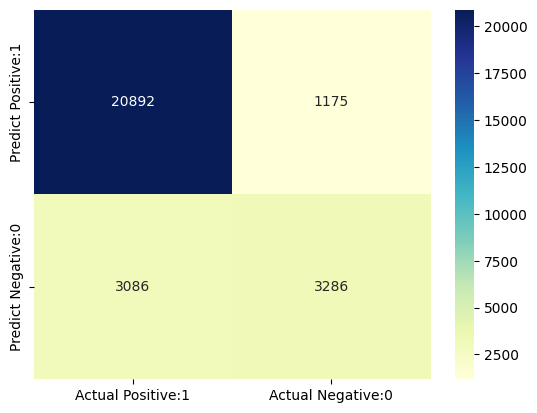

In [227]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## Метрики классификации

Отчет о классификации

**Отчет о классификации** — это еще один способ оценки производительности модели классификации. Он отображает оценки **точности**, **полноты**, **f1** и **поддержки** для модели.

Мы можем распечатать отчет о классификации следующим образом:-

In [228]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          No       0.87      0.95      0.91     22067
         Yes       0.74      0.52      0.61      6372

    accuracy                           0.85     28439
   macro avg       0.80      0.73      0.76     28439
weighted avg       0.84      0.85      0.84     28439



### Точность классификации

In [229]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [230]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))


Classification accuracy : 0.8502


### Ошибка классификации

In [231]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))


Classification error : 0.1498


### Точность

**Точность** можно определить как процент правильно предсказанных положительных результатов из всех предсказанных положительных результатов. Ее можно задать как отношение истинно положительных результатов (TP) к сумме истинно и ложно положительных результатов (TP + FP).

Таким образом, **Точность** определяет долю правильно предсказанных положительных результатов. Она больше касается положительного класса, чем отрицательного.

Математически точность можно определить как отношение `TP к (TP + FP).`

In [232]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))


Precision : 0.9468


### Recall

Полномочность можно определить как процент правильно предсказанных положительных результатов от всех фактических положительных результатов.
Ее можно задать как отношение истинно положительных результатов (TP) к сумме истинно положительных и ложно отрицательных результатов (TP + FN). **Полномочность** также называется **Чувствительностью**.

**Полномочность** определяет долю правильно предсказанных фактических положительных результатов.

Математически полноту можно задать как отношение `TP к (TP + FN).`

In [233]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8713


### True Positive Rate

**True Positive Rate** является синонимом **Recall**.


In [234]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.8713


### Ложноположительный процент

In [235]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.2634


### Специфичность

In [236]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.7366


### f1-score

**f1-score** — это взвешенное гармоническое среднее значение точности и полноты. Наилучшим возможным значением **f1-score** будет 1,0, а наихудшим — 0,0. **f1-score** — это гармоническое среднее значение точности и полноты. Таким образом, **f1-score** всегда ниже показателей точности, поскольку они включают точность и полноту в свои вычисления. Взвешенное среднее значение `f1-score` следует использовать для сравнения моделей классификаторов, а не глобальной точности.

### Поддержка

**Поддержка** — это фактическое количество вхождений класса в нашем наборе данных.

## Регулировка порогового уровня

In [237]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = logreg.predict_proba(X_test)[0:10]

y_pred_prob

array([[0.91388   , 0.08612   ],
       [0.8356346 , 0.1643654 ],
       [0.82035827, 0.17964173],
       [0.99025721, 0.00974279],
       [0.95727656, 0.04272344],
       [0.97992442, 0.02007558],
       [0.17844291, 0.82155709],
       [0.234824  , 0.765176  ],
       [0.90053202, 0.09946798],
       [0.85483277, 0.14516723]])

### Наблюдения

- В каждой строке сумма чисел равна 1.

- Есть 2 столбца, которые соответствуют 2 классам - 0 и 1.

- Класс 0 - прогнозируемая вероятность того, что завтра не будет дождя.

- Класс 1 - прогнозируемая вероятность того, что завтра будет дождь.

- Важность прогнозируемых вероятностей

- Мы можем ранжировать наблюдения по вероятности дождя или его отсутствия.

- процесс predict_proba

- Прогнозирует вероятности

- Выбирает класс с самой высокой вероятностью

- Пороговый уровень классификации

- Пороговый уровень классификации равен 0,5.

- Класс 1 - вероятность дождя прогнозируется, если вероятность > 0,5.

- Класс 0 - вероятность отсутствия дождя прогнозируется, если вероятность < 0,5.

In [238]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - No rain tomorrow (0)', 'Prob of - Rain tomorrow (1)'])

y_pred_prob_df

,Prob of - No rain tomorrow (0),Prob of - Rain tomorrow (1)
0,0.913880,0.086120
1,0.835635,0.164365
2,0.820358,0.179642
3,0.990257,0.009743
4,0.957277,0.042723
5,0.979924,0.020076
6,0.178443,0.821557
7,0.234824,0.765176
8,0.900532,0.099468
9,0.854833,0.145167


In [239]:
# print the first 10 predicted probabilities for class 1 - Probability of rain

logreg.predict_proba(X_test)[0:10, 1]

array([0.08612   , 0.1643654 , 0.17964173, 0.00974279, 0.04272344,
       0.02007558, 0.82155709, 0.765176  , 0.09946798, 0.14516723])

In [240]:
# store the predicted probabilities for class 1 - Probability of rain

y_pred1 = logreg.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

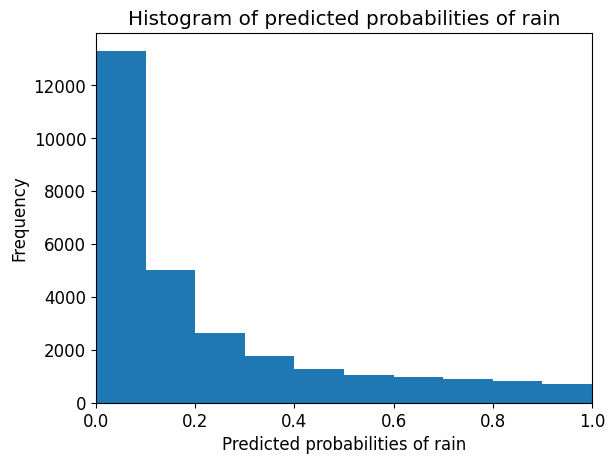

In [241]:
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of rain')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of rain')
plt.ylabel('Frequency')

### Наблюдения

- Мы видим, что гистограмма выше имеет сильный положительный перекос.

- Первый столбец говорит нам, что имеется приблизительно 15000 наблюдений с вероятностью от 0,0 до 0,1.

- Имеется небольшое количество наблюдений с вероятностью > 0,5.

- Таким образом, это небольшое количество наблюдений предсказывает, что завтра будет дождь.

- Большинство наблюдений предсказывает, что завтра дождя не будет.

### Комментарии

- В бинарных задачах порог 0,5 используется по умолчанию для преобразования предсказанных вероятностей в предсказания классов.

- Порог можно настроить для увеличения чувствительности или специфичности.

- Чувствительность и специфичность имеют обратную зависимость. Увеличение одного всегда уменьшает другое и наоборот.

- Увеличение порогового уровня приводит к повышению точности.

- Настройка порогового уровня должна быть одним из последних шагов, которые вы делаете в процессе построения модели.

## ROC - AUC

### ROC-кривая

Еще один инструмент для визуального измерения производительности модели классификации — **ROC-кривая**. ROC-кривая означает **Receiver Operating Characteristic Curve**. **ROC-кривая** — это график, который показывает производительность модели классификации на различных пороговых уровнях классификации.

**ROC-кривая** отображает **True Positive Rate (TPR)** в зависимости от **False Positive Rate (FPR)** на различных пороговых уровнях.

**True Positive Rate (TPR)** также называется **Recall**. Он определяется как отношение `TP к (TP + FN).`

**False Positive Rate (FPR)** определяется как отношение `FP к (FP + TN).`

В ROC-кривой мы сосредоточимся на TPR (True Positive Rate) и FPR (False Positive Rate) одной точки. Это даст нам общую производительность кривой ROC, которая состоит из TPR и FPR на различных пороговых уровнях. Таким образом, кривая ROC отображает TPR против FPR на различных пороговых уровнях классификации. Если мы снизим пороговые уровни, это может привести к тому, что больше элементов будут классифицированы как положительные. Это увеличит как истинно положительные (TP), так и ложно положительные (FP).

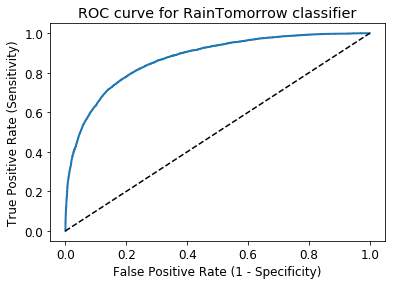

In [130]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = 'Yes')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for RainTomorrow classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()


Кривая ROC помогает нам выбрать пороговый уровень, который обеспечивает баланс чувствительности и специфичности для конкретного контекста.

### ROC AUC

**ROC AUC** означает **Receiver Operating Characteristic - Area Under Curve**. Это метод сравнения производительности классификатора. В этом методе мы измеряем `площадь под кривой (AUC)`. Идеальный классификатор будет иметь ROC AUC, равную 1, тогда как чисто случайный классификатор будет иметь ROC AUC, равную 0,5.

Таким образом, **ROC AUC** - это процент графика ROC, который находится под кривой.

In [131]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8729


### Комментарии

- ROC AUC — это сводка производительности классификатора в виде одного числа. Чем выше значение, тем лучше классификатор.

- ROC AUC нашей модели приближается к 1. Таким образом, мы можем сделать вывод, что наш классификатор хорошо справляется с прогнозированием того, будет ли завтра дождь или нет.

In [132]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(logreg, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8695


## Оценка и улучшение модели

Будем использовать несколько методов для улучшения производительности модели. Я рассмотрю 3 метода, которые используются на практике для улучшения производительности. Это «рекурсивное исключение признаков», «k-кратная перекрестная проверка» и «оптимизация гиперпараметров с использованием GridSearchCV».

## Рекурсивное исключение признаков с перекрестной проверкой

`Рекурсивное исключение признаков (RFE)` — это метод выбора признаков, который помогает нам выбрать лучшие признаки из заданного количества признаков. Сначала модель строится на основе всех заданных признаков. Затем она удаляет наименее полезный предиктор и снова строит модель. Этот процесс повторяется до тех пор, пока из модели не будут удалены все неважные признаки.

Метод `Рекурсивное исключение признаков с перекрестной проверкой (RFECV) выбора признаков` выбирает лучшее подмножество признаков для оценщика, удаляя от 0 до N признаков итеративно с помощью рекурсивного исключения признаков. Затем он выбирает лучшее подмножество на основе точности или оценки перекрестной проверки или roc-auc модели. Метод рекурсивного исключения признаков исключает n признаков из модели, подгоняя модель несколько раз и на каждом шаге удаляя самые слабые признаки.

Будем использовать этот метод для выбора лучших признаков из этой модели.

In [133]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=logreg, step=1, cv=5, scoring='accuracy')

rfecv = rfecv.fit(X_train, y_train)

In [134]:
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 112


In [135]:
# transform the training data

X_train_rfecv = rfecv.transform(X_train)


# train classifier

logreg.fit(X_train_rfecv, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [136]:
# test classifier on test data

X_test_rfecv = rfecv.transform(X_test)

y_pred_rfecv = logreg.predict(X_test_rfecv)

In [137]:
# print mean accuracy on transformed test data and labels

print ("Classifier score: {:.4f}".format(logreg.score(X_test_rfecv,y_test)))

Classifier score: 0.8500


Наша исходная оценка точности модели составляет 0,8501, тогда как оценка точности после RFECV составляет 0,8500. Таким образом, мы можем получить примерно такую ​​же точность, но с сокращенным или оптимальным набором признаков.

### Повторный просмотр матрицы путаницы

Ппостроим матрицу путаницы для этой модели, чтобы получить представление об ошибках, которые допускает наша модель.

In [138]:
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_test, y_pred_rfecv)

print('Confusion matrix\n\n', cm1)

print('\nTrue Positives(TP1) = ', cm1[0,0])

print('\nTrue Negatives(TN1) = ', cm1[1,1])

print('\nFalse Positives(FP1) = ', cm1[0,1])

print('\nFalse Negatives(FN1) = ', cm1[1,0])

Confusion matrix

 [[20893  1174]
 [ 3091  3281]]

True Positives(TP1) =  20893

True Negatives(TN1) =  3281

False Positives(FP1) =  1174

False Negatives(FN1) =  3091


Мы видим, что в исходной модели у нас FP = 1175, тогда как FP1 = 1174. Таким образом, мы получаем примерно одинаковое количество ложных положительных результатов. Также, FN = 3087, тогда как FN1 = 3091. Таким образом, мы получаем немного больше ложных отрицательных результатов.

## Перекрестная проверка k-кратности

In [139]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.84690783 0.84624852 0.84633642 0.84958903 0.84773626]


Мы можем обобщить точность перекрестной проверки, вычислив ее среднее значение.

In [140]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8474


Наш исходный счет модели оказался равным 0,8476. Средний счет перекрестной проверки составляет 0,8474. Таким образом, мы можем сделать вывод, что перекрестная проверка не приводит к улучшению производительности.

## Оптимизация гиперпараметров с использованием GridSearch CV

In [141]:
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]



grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [142]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.8474


Parameters that give the best results : 

 {'penalty': 'l1'}


Estimator that was chosen by the search : 

 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=0, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)


In [143]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.8507


### Комментарии

- Наша исходная точность тестирования модели составляет 0,8501, тогда как точность GridSearch CV составляет 0,8507.

- Мы видим, что GridSearch CV улучшает производительность для этой конкретной модели.

## Отчет

1. Оценка точности модели логистической регрессии составляет 0,8501. Таким образом, модель очень хорошо справляется с прогнозированием того, будет ли завтра дождь в Австралии.

2. Небольшое количество наблюдений предсказывает, что завтра будет дождь. Большинство наблюдений предсказывает, что завтра дождя не будет.

3. Модель не показывает признаков переобучения.

4. Увеличение значения C приводит к более высокой точности тестового набора, а также к небольшому повышению точности обучающего набора. Таким образом, мы можем сделать вывод, что более сложная модель должна работать лучше.

5. Увеличение порогового уровня приводит к повышению точности.

6. ROC AUC нашей модели приближается к 1. Таким образом, мы можем сделать вывод, что наш классификатор хорошо справляется с прогнозированием того, будет ли завтра дождь.

7. Наша исходная оценка точности модели составляет 0,8501, тогда как оценка точности после RFECV составляет 0,8500. Таким образом, мы можем получить примерно такую ​​же точность, но с сокращенным набором признаков.

8. В исходной модели FP = 1175, тогда как FP1 = 1174. Таким образом, мы получаем примерно одинаковое количество ложноположительных результатов. Кроме того, FN = 3087, тогда как FN1 = 3091. Таким образом, мы получаем немного больше ложноотрицательных результатов.

9. Наш исходный балл модели составляет 0,8476. Средний балл перекрестной проверки составляет 0,8474. Таким образом, мы можем сделать вывод, что перекрестная проверка не приводит к улучшению производительности.

10. Точность теста нашей исходной модели составляет 0,8501, тогда как точность GridSearch CV составляет 0,8507. Мы видим, что GridSearch CV улучшает производительность для этой конкретной модели.